# Импортируем необходимые библиотеки:

In [1]:
import pandas as pd
import pandas as pd
import seaborn as sns    
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

# Загружаем набор данных

In [3]:
df = pd.read_csv("Student_Performance.csv")

# Обзор данных

In [5]:
df.head(10)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
5,3,78,No,9,6,61.0
6,7,73,Yes,5,6,63.0
7,8,45,Yes,4,6,42.0
8,5,77,No,8,2,61.0
9,4,89,No,4,0,69.0


- **Id - индефикатор**
- **Hours Studied - Изученные часы**
- **Previous Scores - Предыдущие оценки**
- **Extracurricular Activities - Внеклассные занятия**
- **Sleep Hours - Часы сна**
- **Sample Question Papers Practiced - Практикуемые образцы заданий с вопросами**
- **Performance Index - Процент успеваемости**


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [8]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [9]:
df.dtypes

Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object

In [10]:
df.isna().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [11]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


# Обработка данных

#### Размерность набора данных: 10000 наблюдений и 6 признаков. В наборе данных не присутствуют пропущенные значения, аномалий небыло найдено и дубликатов явно не имеется.

In [13]:
df['Extracurricular Activities'] = df['Extracurricular Activities'].replace({
    'Yes': '1',
    'No': '0'
})

In [14]:
df['Extracurricular Activities'].unique()

array(['1', '0'], dtype=object)

In [15]:
df.dtypes

Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object

# Разведочный анализ данных

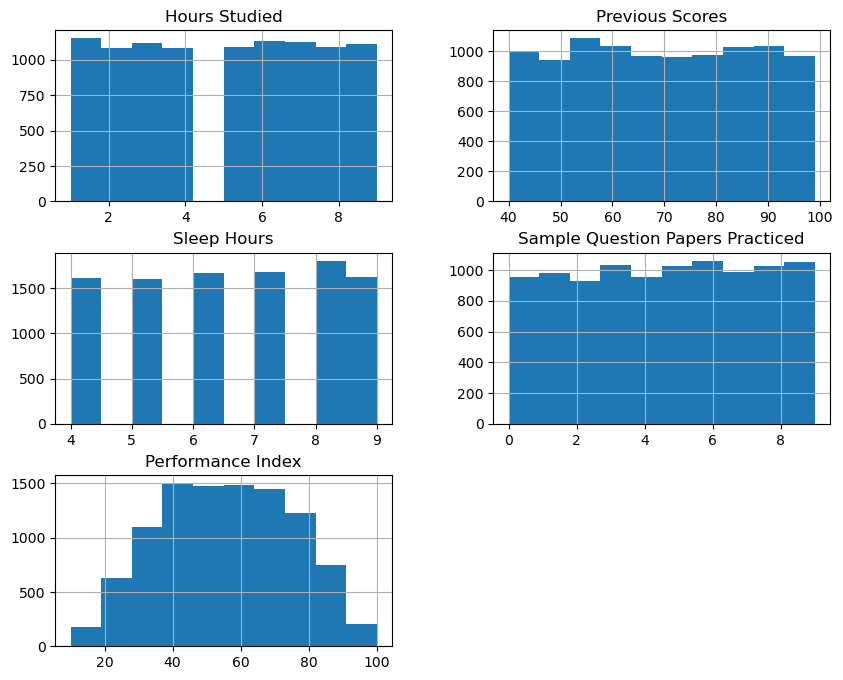

In [17]:
df.hist(figsize=(10,8), bins=10);

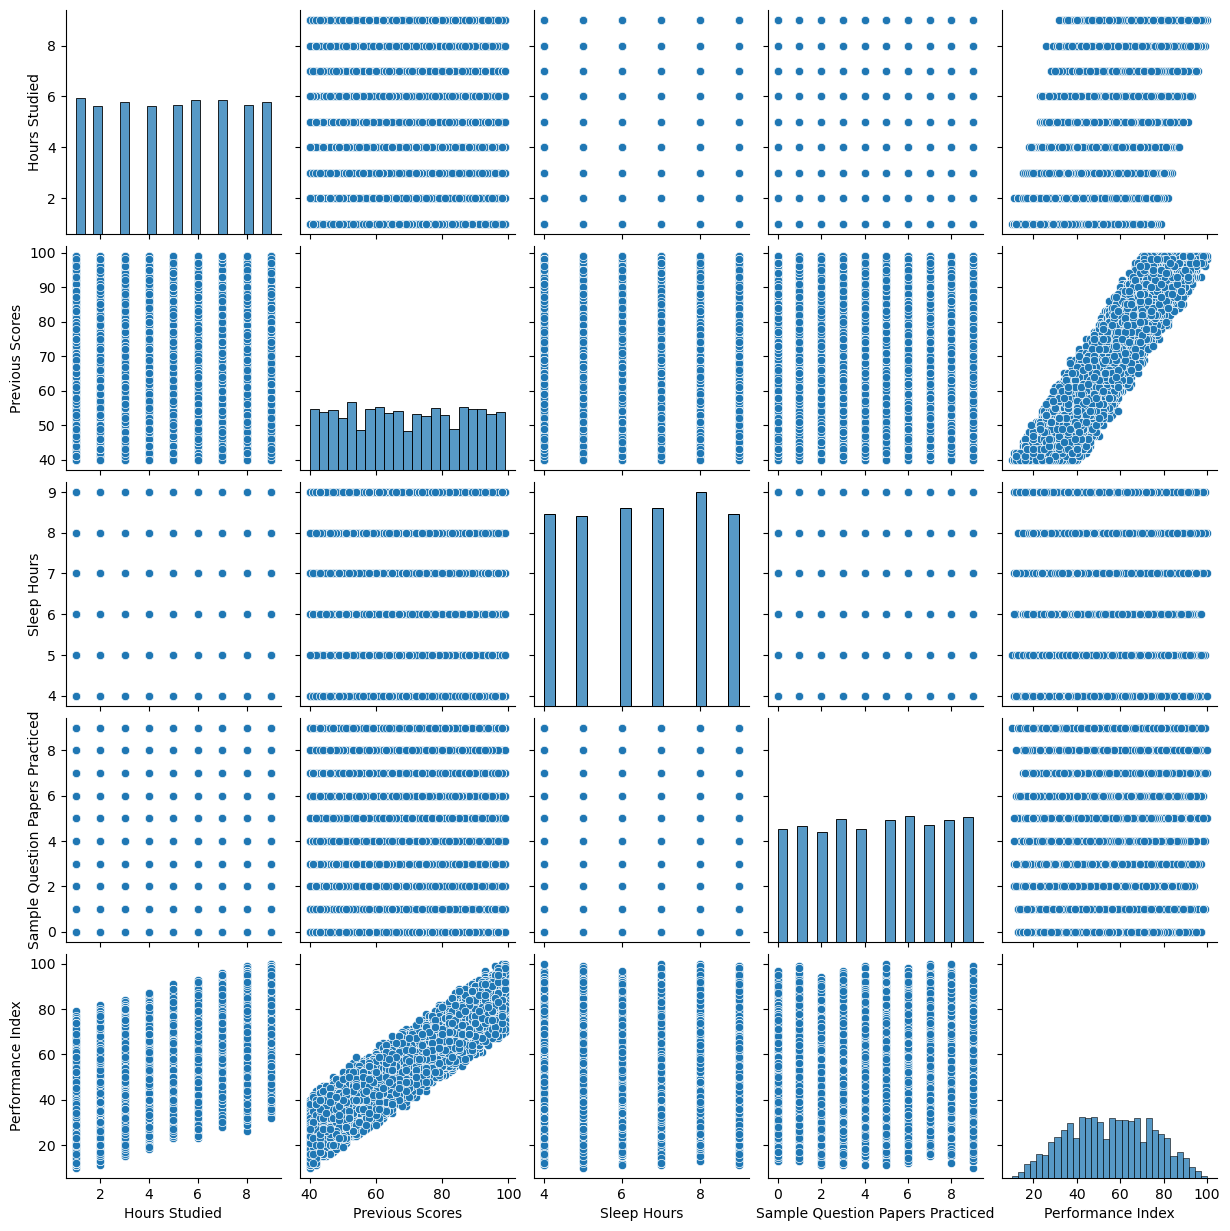

In [18]:
sns.pairplot(df)

<Axes: >

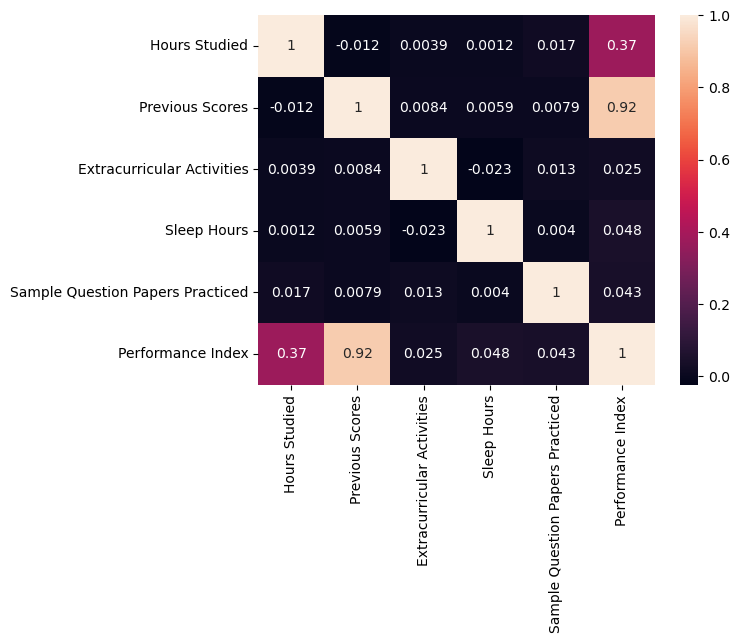

In [19]:
sns.heatmap(df[["Hours Studied", "Previous Scores", "Extracurricular Activities", "Sleep Hours", "Sample Question Papers Practiced", "Performance Index"]].corr(), annot=True)

#### Наблюдается зависимость между признаками, такими как "Часы изучения" и "Индекс производительности"

<Axes: >

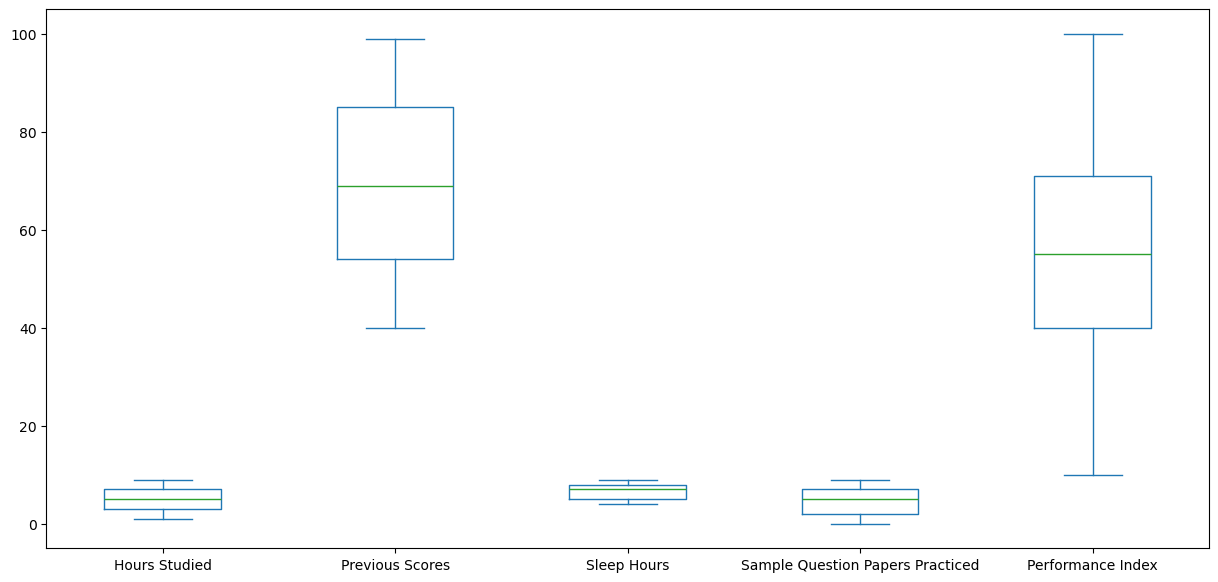

In [21]:
df.plot.box(figsize=(15, 7))

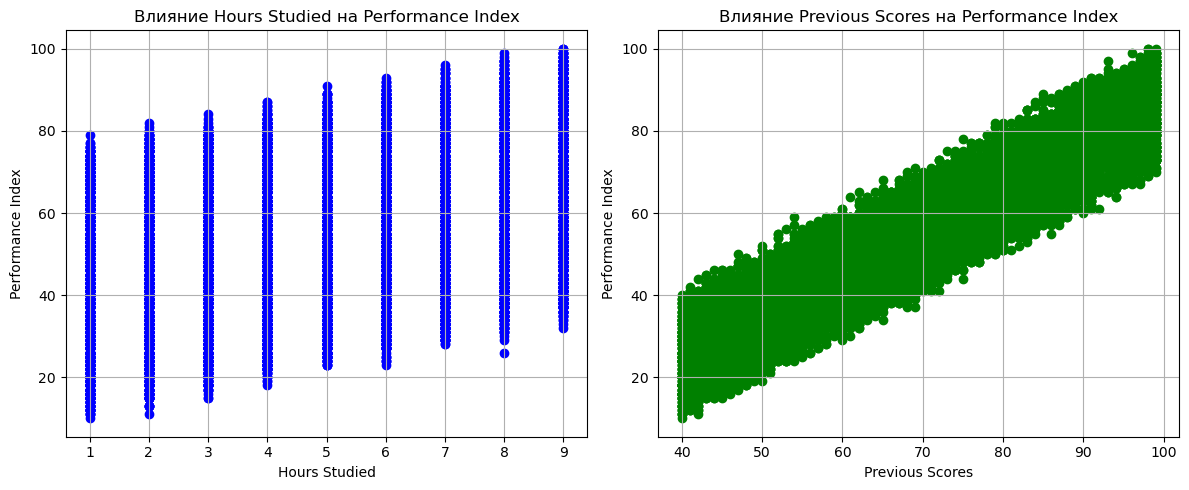

In [22]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(df['Hours Studied'], df['Performance Index'], color='blue')
plt.title('Влияние Hours Studied на Performance Index')
plt.xlabel('Hours Studied')
plt.ylabel('Performance Index')
plt.grid()

plt.subplot(1, 2, 2)
plt.scatter(df['Previous Scores'], df['Performance Index'], color='green')
plt.title('Влияние Previous Scores на Performance Index')
plt.xlabel('Previous Scores')
plt.ylabel('Performance Index')
plt.grid()

plt.tight_layout()
plt.show()

# Обучение классификатора

##### Загрузка и подготовка данных:

In [25]:
df['Extracurricular Activities'] = df['Extracurricular Activities'].astype(int)
X = df[['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']]
y = (df['Performance Index'] >= 50).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### Логистическая регрессия:

In [27]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Confusion Matrix:
[[ 798   28]
 [  31 1143]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       826
           1       0.98      0.97      0.97      1174

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000



##### Случайный лес:

In [29]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Confusion Matrix:
[[ 798   28]
 [  39 1135]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       826
           1       0.98      0.97      0.97      1174

    accuracy                           0.97      2000
   macro avg       0.96      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000



##### Метод опорных векторов (SVM):

In [65]:
model_svm = SVC()
model_svm.fit(X_train, y_train)
y_pred_svm = model_svm.predict(X_test)

print("SVM Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

SVM Confusion Matrix:
[[ 801   25]
 [  41 1133]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       826
           1       0.98      0.97      0.97      1174

    accuracy                           0.97      2000
   macro avg       0.96      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000



##### Модель DecisionTreeRegressor

In [67]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

tree_1 = DecisionTreeRegressor(random_state=1, max_depth=9)
tree_1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=9, random_state=1)

In [34]:
pred_train = tree_1.predict(X_train)
pred_test = tree_1.predict(X_test)

print(f'Train R2 {r2_score(y_train, pred_train):.2f}')
print(f'Test R2 {r2_score(y_test, pred_test):.2f}')

Train R2 0.96
Test R2 0.87


# Вывод
#### 1. Был загружен набор данных о производительности студентов. Первые наблюдения показали, что в наборе данных отсутствуют пропуски и дубликаты. Все признаки были определены корректно, с ожидаемыми типами данных.

#### 2. Проведена предобработка данных. Признак "Внеклассные занятия" был преобразован в числовой формат, заменив значения 'Yes' на 1 и 'No' на 0. Целевая переменная "Индекс производительности" была бинаризована, где 1 соответствует индексам, равным или превышающим 50, и 0 — остальным.

#### 3. Проведен разведочный анализ данных. Наблюдается зависимость между признаками, такими как "Часы изучения" и "Индекс производительности", где увеличение часов изучения в целом связано с повышением индекса.

#### 4. Созданы три модели классификации: логистическая регрессия, случайный лес и метод опорных векторов (SVM). Каждая модель была обучена на 80% данных, а затем протестирована на 20%. Для каждой модели были представлены матрицы путаницы и отчеты о классификации, которые продемонстрировали разную эффективность в прогнозировании успешности студентов.

#### В результате, модели показывают потенциальные способы улучшения прогнозирования производительности студентов на основе различных факторов, таких как изученные часы, предыдущие оценки и внеучебная деятельность.